In [82]:
print("hello")

hello


In [83]:

import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import add_dummy_feature
import matplotlib as mpl
from sklearn.linear_model import SGDRegressor
from math import ceil

<h4><b><u>GRADIENT DESCENT</u></b></h4>


$\theta_{\text{next}} = \theta_{\text{prev}} - \eta \nabla_{\theta} f(\theta) $<br><br>$\eta = \text{learning rate}$

In [84]:
eta = 0.1 # learning rate
n_epoch = 1000


#data
m = 200
rng = np.random.default_rng(seed=42)
x = 2 * rng.random((m,1))
y = 4 + 3 * x + rng.standard_normal((m,1))

x_b = add_dummy_feature(x)

In Batch gradient descent :

$\text{gradients} = \frac{2}m * X^{T} (X\theta - y) $

In [85]:
theta = rng.standard_normal((2,1)) #random theta at first

In [86]:
for epoch in range(n_epoch):
    gradients = (2 / m) * x_b.T @ (x_b @ theta - y)
    theta = theta - eta * gradients

In [87]:
theta

array([[3.69084138],
       [3.32960458]])

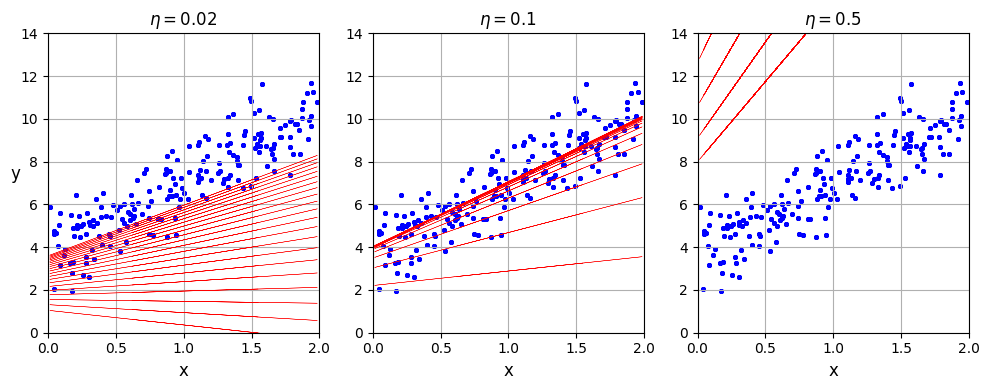

In [93]:

def plot_different_eta(eta , theta):
    theta_path = []
    n_epoch = 1000
    for epoch in range(n_epoch):
        gradients = (2 / m) * x_b.T @ (x_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
        if epoch <=20:
            y_pred = x_b @ theta
            plt.scatter(x , y , c="b" , s=5)
            plt.axis([0. , 2. , 0 , 14])
            plt.plot(x , y_pred , "r-" , linewidth=0.3)
    return theta_path

fig , axes = plt.subplots(nrows=1 , ncols=3 , figsize=(10,4))
theta = rng.standard_normal((2,1))
plt.sca(axes[0,])
plot_different_eta(0.02 ,theta)
plt.title(fr"$\eta = 0.02$")
plt.grid()
plt.ylabel("y" , fontsize=12 , rotation =0)
plt.xlabel("x" , fontsize=12)
plt.sca(axes[1,])
theta_path_bgd = plot_different_eta(0.1 , theta)
plt.title(fr"$\eta = 0.1$")
plt.grid()
plt.xlabel("x" , fontsize=12)
plt.sca(axes[2,])
plot_different_eta(0.5 , theta)
plt.title(fr"$\eta = 0.5$")
plt.grid()
plt.xlabel("x" , fontsize=12)


plt.tight_layout()
plt.show()


<b><h4><u>STOCHASTIC GRADIENT DESCENT</u></h4></b>

$\text{gradient at each iteration} = 2 * X^{T} (X\theta - y) $

Text(0, 0.5, 'y')

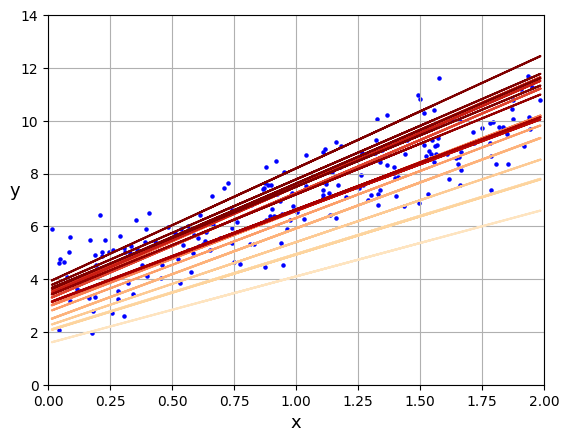

In [94]:
n_epoch = 50
t0 , t1 = 5 , 50 #learning schedule parameters 
theta_path_sgd = []

def learning_schedule(t):
    return t0/ (t + t1)

theta = rng.standard_normal((2,1)) #random theta 
n_epoch = 1000
for epoch in range(n_epoch):
    for iteration in range(m):
        random_index = rng.integers(m)
        x_iteration = x_b[random_index: random_index+1]
        y_iteration = y[random_index : random_index +1]
        
        gradient = 2  * x_iteration.T @ (x_iteration @ theta - y_iteration) #dont divide by m for stochastic 
        
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradient
        theta_path_sgd.append(theta)
        
        if epoch == 0 and iteration <= 20:
            y_pred = x_b @ theta
            plt.plot(x , y_pred , c=mpl.colors.rgb2hex(plt.cm.OrRd(iteration / 20 + 0.15)) )
            
plt.scatter(x , y , c="b" , s=5)
plt.axis([0. , 2. , 0 , 14])
plt.grid()
plt.xlabel("x" , fontsize=13)
plt.ylabel("y" , fontsize=13 , rotation=0)


In [95]:
sgd_reg = SGDRegressor(max_iter=1000 , tol=1e-5 , penalty=None, eta0=0.01,
                       n_iter_no_change=100 , random_state=42)

sgd_reg.fit(x , y.ravel())

#it expects 1d targets

,"loss loss: str, default='squared_error'The loss function to be used. The possible values are 'squared_error','huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'The 'squared_error' refers to the ordinary least squares fit.'huber' modifies 'squared_error' to focus less on getting outlierscorrect by switching from squared to linear loss past a distance ofepsilon. 'epsilon_insensitive' ignores errors less than epsilon and islinear past that; this is the loss function used in SVR.'squared_epsilon_insensitive' is the same but becomes squared loss pasta tolerance of epsilon.More details about the losses formulas can be found in the:ref:`User Guide `.",'squared_error'
,"penalty penalty: {'l2', 'l1', 'elasticnet', None}, default='l2'The penalty (aka regularization term) to be used. Defaults to 'l2'which is the standard regularizer for linear SVM models. 'l1' and'elasticnet' might bring sparsity to the model (feature selection)not achievable with 'l2'. No penalty is added when set to `None`.You can see a visualisation of the penalties in:ref:`sphx_glr_auto_examples_linear_model_plot_sgd_penalties.py`.",None
,"alpha alpha: float, default=0.0001Constant that multiplies the regularization term. The higher thevalue, the stronger the regularization. Also used to compute thelearning rate when `learning_rate` is set to 'optimal'.Values must be in the range `[0.0, inf)`.",0.0001
,"l1_ratio l1_ratio: float, default=0.15The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1.l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1.Only used if `penalty` is 'elasticnet'.Values must be in the range `[0.0, 1.0]` or can be `None` if`penalty` is not `elasticnet`... versionchanged:: 1.7 `l1_ratio` can be `None` when `penalty` is not ""elasticnet"".",0.15
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If False, thedata is assumed to be already centered.",True
,"max_iter max_iter: int, default=1000The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the ``fit`` method, and not the:meth:`partial_fit` method.Values must be in the range `[1, inf)`... versionadded:: 0.19",1000
,"tol tol: float or None, default=1e-3The stopping criterion. If it is not None, training will stopwhen (loss > best_loss - tol) for ``n_iter_no_change`` consecutiveepochs.Convergence is checked against the training loss or thevalidation loss depending on the `early_stopping` parameter.Values must be in the range `[0.0, inf)`... versionadded:: 0.19",1e-05
,"shuffle shuffle: bool, default=TrueWhether or not the training data should be shuffled after each epoch.",True
,"verbose verbose: int, default=0The verbosity level.Values must be in the range `[0, inf)`.",0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-insensitive loss functions; only if `loss` is'huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'.For 'huber', determines the threshold at which it becomes lessimportant to get the prediction exactly right.For epsilon-insensitive, any differences between the current predictionand the correct label are ignored if they are less than this threshold.Values must be in the range `[0.0, inf)`.",0.1
,"random_state random_state: int, RandomState instance, default=NoneUsed for shuffling the data, when ``shuffle`` is set to ``True``.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",42


<b><h4><u>STOCHASTIC GRADIENT DESCENT</u></h4></b>

$\text{gradient for each batch size} = \frac{2}{\text{mini  batch size}} \cdot X^{T} (X\theta - y) $

In [96]:
n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

rng = np.random.default_rng(seed=42)
theta = rng.standard_normal((2, 1))  # randomly initialized model parameters

t0, t1 = 200, 1000  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta_path_mgd = []
for epoch in range(n_epochs):
    shuffled_indices = rng.permutation(m)
    x_b_shuffled = x_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        x_iteration = x_b_shuffled[idx : idx + minibatch_size]
        y_iteration = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * x_iteration.T @ (x_iteration @ theta - y_iteration)
        eta = learning_schedule(epoch * n_batches_per_epoch + iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

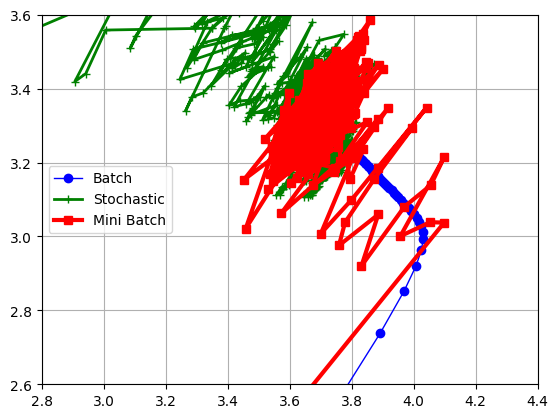

In [106]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.plot(theta_path_bgd [: , 0], theta_path_bgd[: , 1] , "b-o" , label="Batch" , linewidth=1)
plt.plot(theta_path_sgd[: , 0] , theta_path_sgd[: , 1] , "g-+" , label="Stochastic" , linewidth=2)
plt.plot(theta_path_mgd[: , 0] , theta_path_mgd[: , 1] , "r-s" , label="Mini Batch" , linewidth=3)
plt.legend(loc="center left")

plt.axis([2.8 , 4.4 , 2.6 , 3.6])
plt.grid()